In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor


We will follow this general procedure for modeling time series:

Plot the time series. Look for trends, seasonality, and step changes.
Model and remove drift and seasonal components.
Fit a model to the residuals.
Add drift and seasonality back into the model.

The Household Power Consumption dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years.

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

In [5]:
# loading the dataset.
HusHoldElec = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


In [6]:
# Copy of original data
HusHoldElec_original=HusHoldElec.copy()

In [7]:
HusHoldElec.columns

Index([u'Global_active_power', u'Global_reactive_power', u'Voltage',
       u'Global_intensity', u'Sub_metering_1', u'Sub_metering_2',
       u'Sub_metering_3'],
      dtype='object')

In [8]:
HusHoldElec.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
print(HusHoldElec.shape)
print(HusHoldElec.head())

(2075259, 7)
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.

In [10]:
# mark all missing values
HusHoldElec.replace('?', np.nan, inplace=True)


In [11]:
HusHoldElec.head(), HusHoldElec.tail()

(                    Global_active_power Global_reactive_power  Voltage  \
 datetime                                                                 
 2006-12-16 17:24:00               4.216                 0.418  234.840   
 2006-12-16 17:25:00               5.360                 0.436  233.630   
 2006-12-16 17:26:00               5.374                 0.498  233.290   
 2006-12-16 17:27:00               5.388                 0.502  233.740   
 2006-12-16 17:28:00               3.666                 0.528  235.680   
 
                     Global_intensity Sub_metering_1 Sub_metering_2  \
 datetime                                                             
 2006-12-16 17:24:00           18.400          0.000          1.000   
 2006-12-16 17:25:00           23.000          0.000          1.000   
 2006-12-16 17:26:00           23.000          0.000          2.000   
 2006-12-16 17:27:00           23.000          0.000          1.000   
 2006-12-16 17:28:00           15.800          

In [12]:
# Start and end date for train
#HusHoldElec['datetime'].min(),HusHoldElec['datetime'].max()

In [13]:
# save in csv file format
HusHoldElec.to_csv('household_power_consumption.csv')

In [14]:
HusHoldElec.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [15]:
# load the new file
HusHoldElec = pd.read_csv('household_power_consumption.csv', header=0)
print(HusHoldElec.head())



              datetime  Global_active_power  Global_reactive_power  Voltage  \
0  2006-12-16 17:24:00                4.216                  0.418   234.84   
1  2006-12-16 17:25:00                5.360                  0.436   233.63   
2  2006-12-16 17:26:00                5.374                  0.498   233.29   
3  2006-12-16 17:27:00                5.388                  0.502   233.74   
4  2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [79]:
# load the new file
#HusHoldElec = pd.read_csv('household_power_consumption.csv', header=0)
#print(HusHoldElec.head())


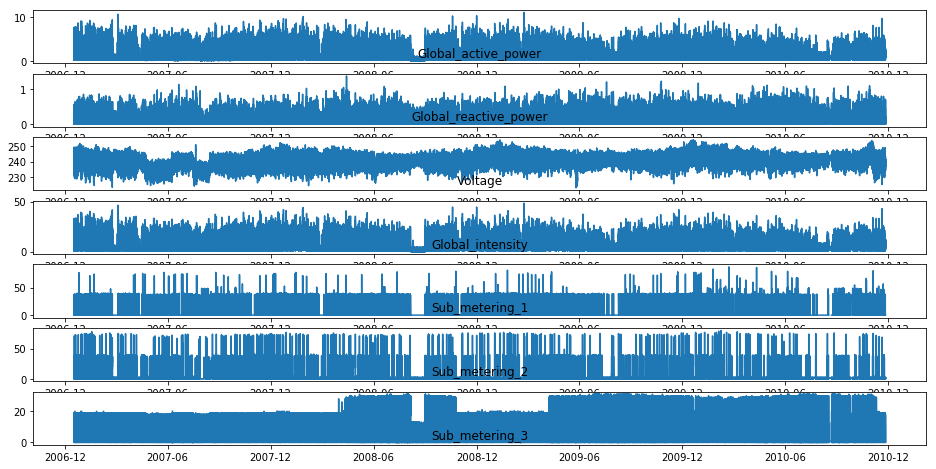

In [17]:
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    plt.plot(dataset[name])
    plt.title(name, y=0)
plt.show()

In [84]:
''' Grouping the dataset by month, day, hour. This type of grouping is not good. Becasue we have to be carfeul
      on the exact dates which we are going to group.'''

df_m = dataset.groupby(pd.Grouper(freq='m')).mean() 
df_d = dataset.groupby(pd.Grouper(freq='d')).mean() 
df_h = dataset.groupby(pd.Grouper(freq='h')).mean() 


In [19]:
#df.head()

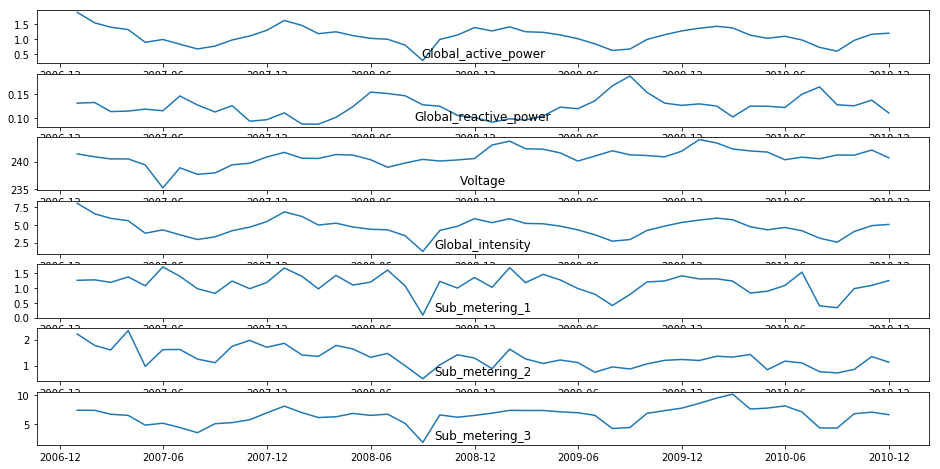

In [20]:
#Plot of  the dataset grouped by by month.
plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(df_m.columns)):
    plt.subplot(len(df_m.columns), 1, i+1)
    name = df_m.columns[i]
    plt.plot(df_m[name])
    plt.title(name, y=0)
plt.show()

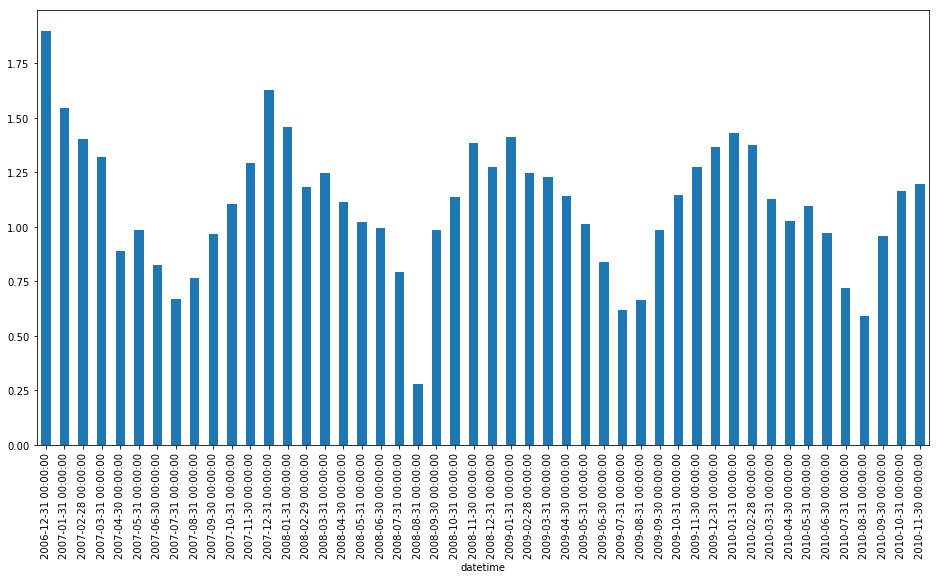

In [86]:
# We only need the Global_active_power, which is the total power consumed in the house hold per day.
plt.figure(figsize=(16,8))
df_m['Global_active_power'].plot.bar()

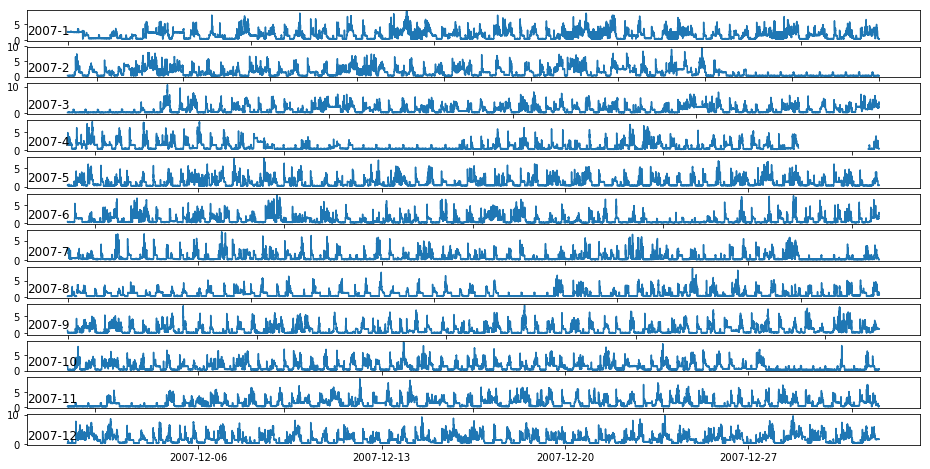

In [22]:


# monthly line plots

months = [x for x in range(1, 13)]
plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(months)):
    #prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
    # determine the month to plot
    month = '2007-' + str(months[i])
    # get all observations for the month
    result = dataset[month]
    # plot the active power for the month
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(month, y=0, loc='left')
plt.show()


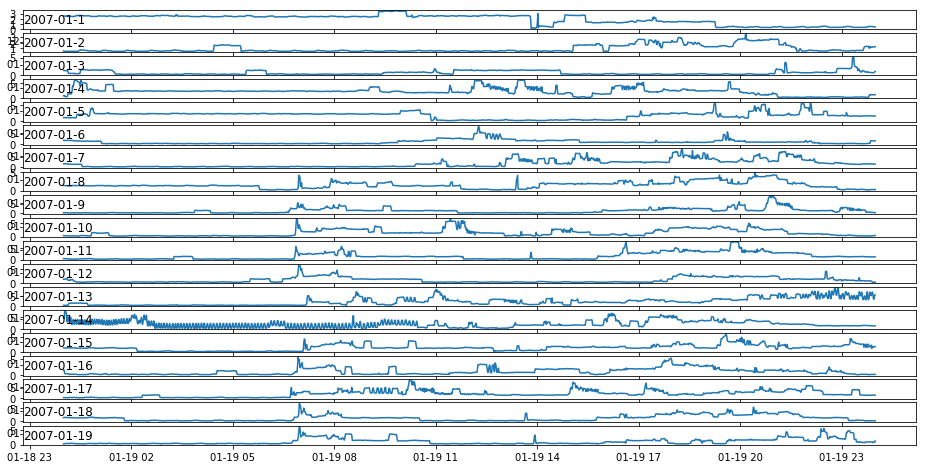

In [23]:
# daily  plot active power for each year
days = [x for x in range(1, 20)]
plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(days)):
    #prepare subplot
    ax = plt.subplot(len(days), 1, i+1)
    # determine the month to plot
    day = '2007-01-' + str(days[i])
    # get all observations for the month
    result = dataset[day]
    # plot the active power for the month
    plt.plot(result['Global_active_power'])
    # add a title to the subplot
    plt.title(day, y=0, loc='left')
plt.show()


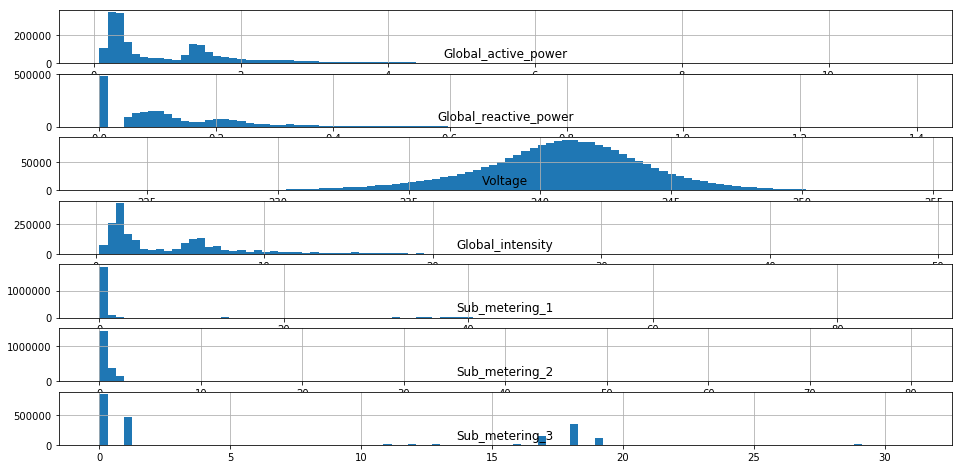

In [24]:
#Time Series Data Distributions
# histogram plot for each variable
plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(dataset.columns)):
    plt.subplot(len(dataset.columns), 1, i+1)
    name = dataset.columns[i]
    dataset[name].hist(bins=100)
    plt.title(name, y=0)
plt.show()

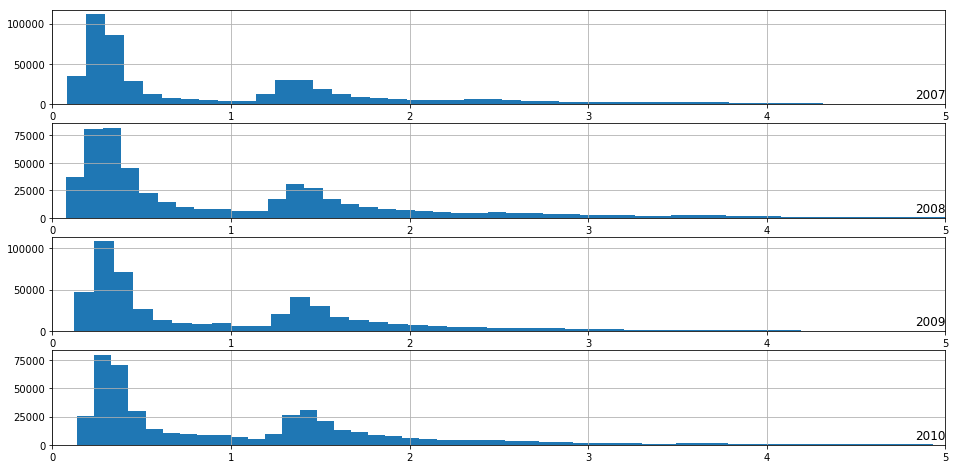

In [25]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure()
plt.figure(figsize=(16,8))
for i in range(len(years)):
    # prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
    # determine the year to plot
    year = years[i]
    # get all observations for the year
    result = dataset[str(year)]
    # plot the active power for the year
    result['Global_active_power'].hist(bins=100)
    # zoom in on the distribution
    ax.set_xlim(0, 5)
    # add a title to the subplot
    plt.title(str(year), y=0, loc='right')
plt.show()

In [26]:
# mark all missing values
dataset.replace('?', np.nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')


In [27]:
# fill missing values with a value at the same time one day ago.
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

In [28]:
# fill missing
fill_missing(dataset.values)

In [29]:
#dataset.drop(['Unnamed: 0'], axis = 1)

In [89]:
#Grouping the dataset by month, day, hour. We don't use this.
df_mm = dataset.groupby(pd.Grouper(freq='m')).sum() 
df_dd = dataset.groupby(pd.Grouper(freq='d')).sum() 
df_hh = dataset.groupby(pd.Grouper(freq='h')).sum() 

In [90]:
#df_dd.head()

Another way of to achieve this easily using the resample() function on the pandas DataFrame. Calling this function with the argument ‘D‘ allows the loaded data indexed by date-time to be grouped by day (see all offset aliases). We can then calculate the sum of all observations for each day and create a new dataset of daily power consumption data for each of the eight variables.

In [32]:
# resample data to hourly
hourly_groups = dataset.resample('H')
hourly_data = hourly_groups.sum()
# resample data to weekly
weekly_groups = dataset.resample('W')
weekly_data = weekly_groups.sum()


# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize

print(hourly_data.shape)
print(daily_data.shape)
print(weekly_data.shape)


# resample data to monthly
monthly_groups = dataset.resample('M')
monthly_data = monthly_groups.sum()
# summarize
print(daily_data.shape)
print(monthly_data.shape)
print(monthly_data.shape)
#print(daily_data.head())
# save
hourly_data.to_csv('household_power_consumption_hourly.csv')
daily_data.to_csv('household_power_consumption_daily.csv')
weekly_data.to_csv('household_power_consumption_wekly.csv')
monthly_data.to_csv('household_power_consumption_months.csv')


(34589, 7)
(1442, 7)
(207, 7)
(1442, 7)
(48, 7)
(48, 7)


In [33]:
# split a univariate dataset into train/test sets
# split into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
dataset = pd.read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

def split_dataset(data):
    #split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

datasett = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'])#, index_col=['datetime'])
datasett = datasett.drop("Unnamed: 0", axis = 1)
train, test = split_dataset(datasett.values)
# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])
# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])


(159, 7, 8)
(Timestamp('2006-12-17 00:00:00'), Timestamp('2010-01-02 00:00:00'))
(46, 7, 8)
(Timestamp('2010-01-03 00:00:00'), Timestamp('2010-11-20 00:00:00'))


In [34]:
len(train)

159

In [35]:
datasett.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0


In [36]:
#datasett[["datetime"]]

In [37]:
# Prediction with ARIMA : AutoRegressive Integrated Moving Average. 

#1. Stationarity of a Time Series

Stationarity of a Time Series¶

There are three basic criterion for a time series to understand whether it is stationary series or not.
Statistical properties of time series such as mean, variance should remain constant over time to call time series is
stationary

constant mean

constant variance

autocovariance that does not depend on time. 

Autocovariance is covariance between time series and lagged time series.
Lets visualize and check seasonality trend of our time series.

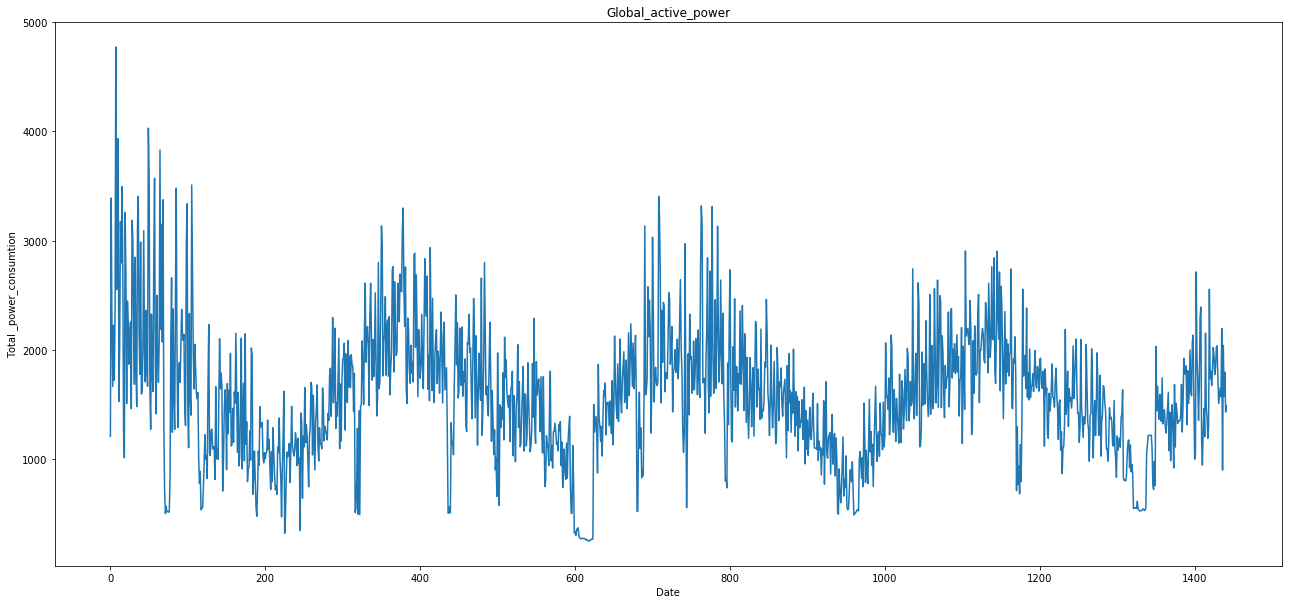

In [38]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(22,10))
#Datasette = datasett["Global_active_power"]
plt.plot(datasett.Global_active_power)
plt.title("Global_active_power")
plt.xlabel("Date")
plt.ylabel("Total _power_consumtion")
plt.show()

# lets create time series from weather 
timeSeries = datasett.loc[:, ["datetime","Global_active_power"]]
timeSeries.index = timeSeries.datetime
ts = timeSeries.drop("datetime",axis=1)

As you can see from plot above, our time series has seasonal variation. 

. Now lets check stationary of time series. We can check stationarity using the following methods:

1. Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.

2. Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.

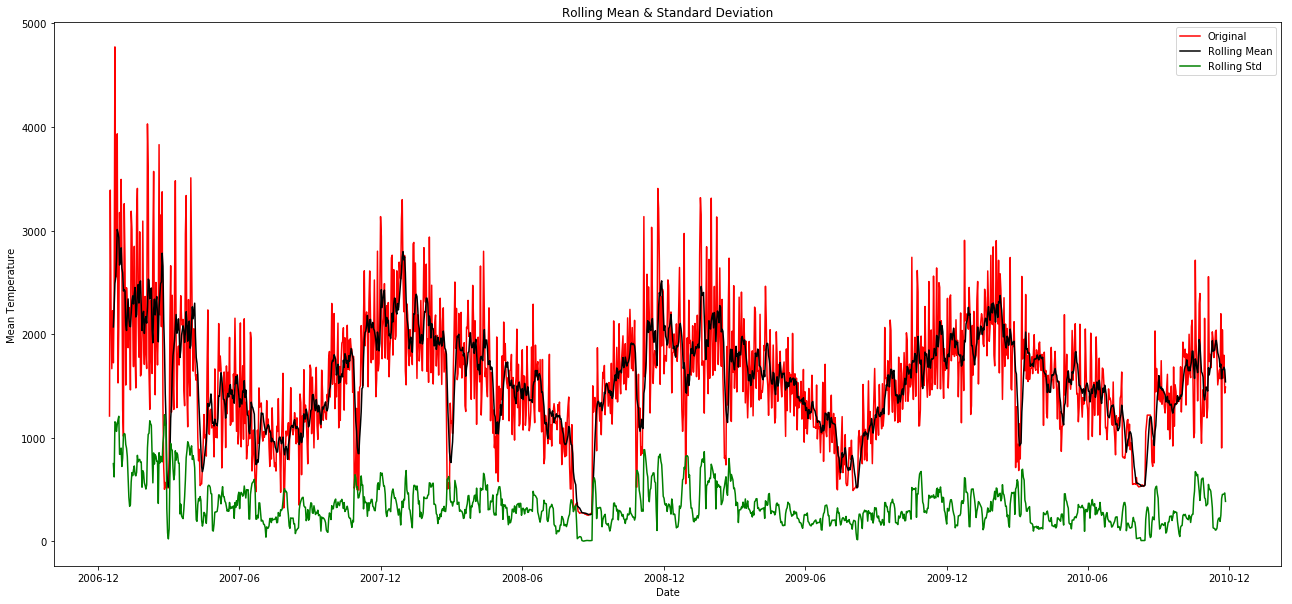

('Test statistic: ', -3.6973847019519086)
('p-value: ', 0.0041500913950944917)
('Critical Values:', {'5%': -2.8635789736973725, '1%': -3.4349667504625652, '10%': -2.5678555388041384})


In [39]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.Global_active_power)

From the graph we can conclude that.

1. As we can see from the black graph we can see that mean is not constant  whihc is the first critearon for stationarity.(no stationary)

2. Variance looks like constant. (yes stationary)

3. The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a   
    stationary series. (yes stationary)

We have stationary time series. However lets look at one more method to avoid trend and seasonality.

Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

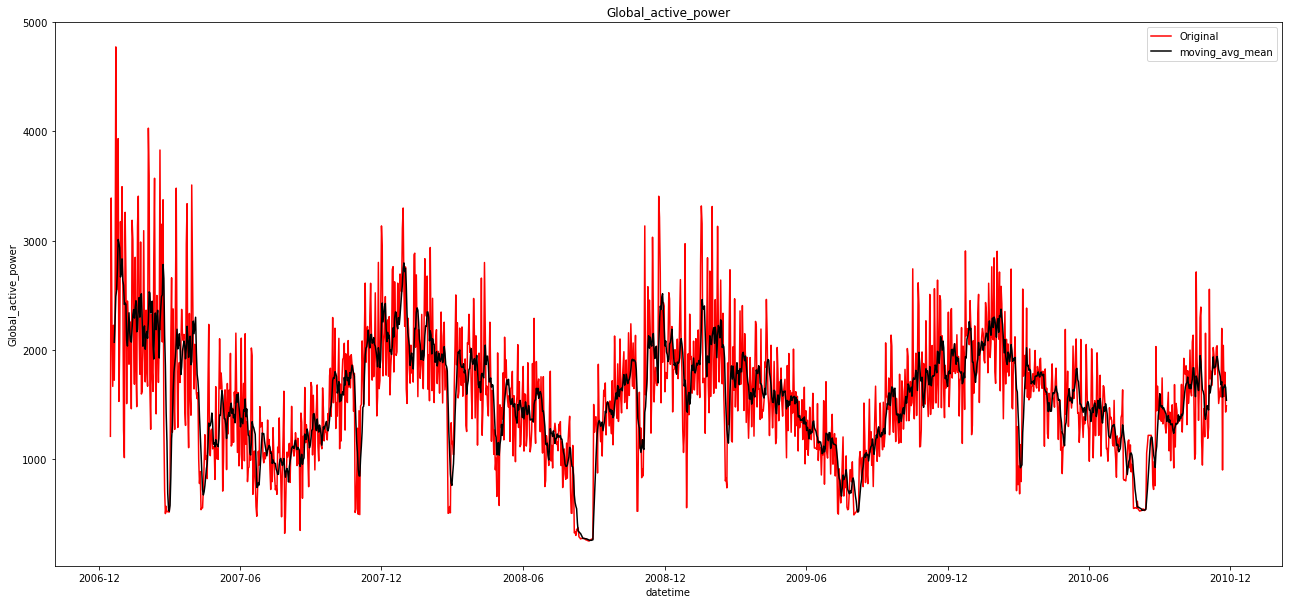

In [40]:
# Moving average method
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Global_active_power")
plt.xlabel("datetime")
plt.ylabel("Global_active_power")
plt.legend()
plt.show()

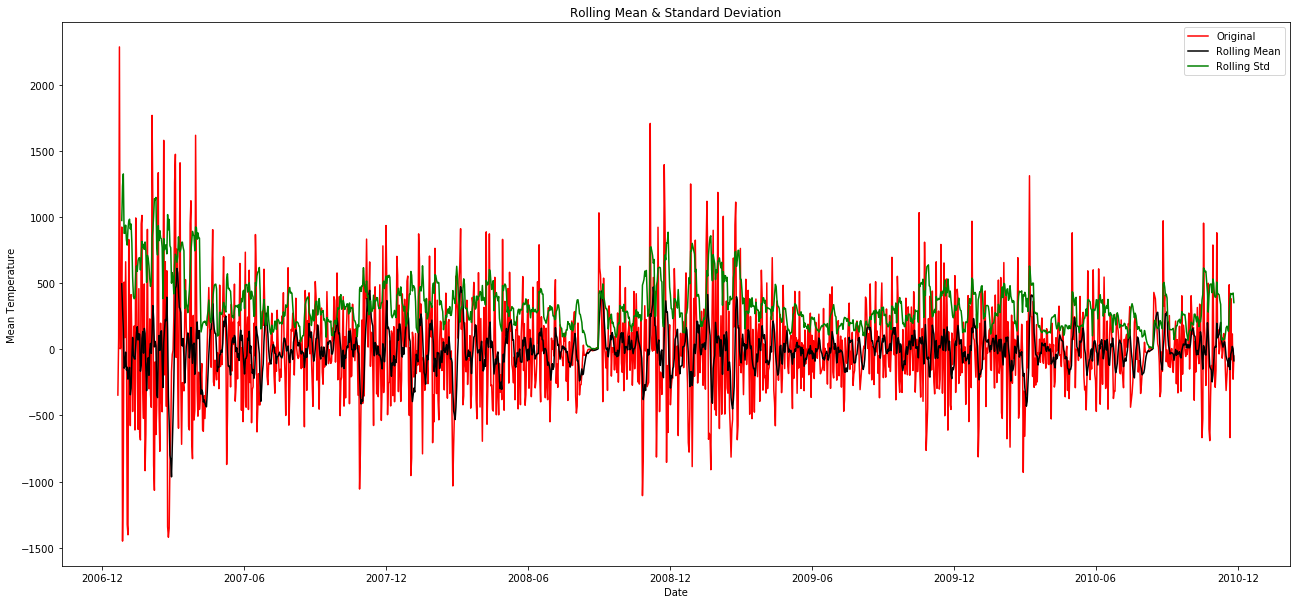

('Test statistic: ', -9.9119619330102271)
('p-value: ', 3.1517546945603313e-17)
('Critical Values:', {'5%': -2.8635876408463079, '1%': -3.4349863902854607, '10%': -2.5678601542596322})


In [41]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.Global_active_power)

1. Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
2. Constant variance. It looks like constant. (yes stationary)
3. The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.

Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

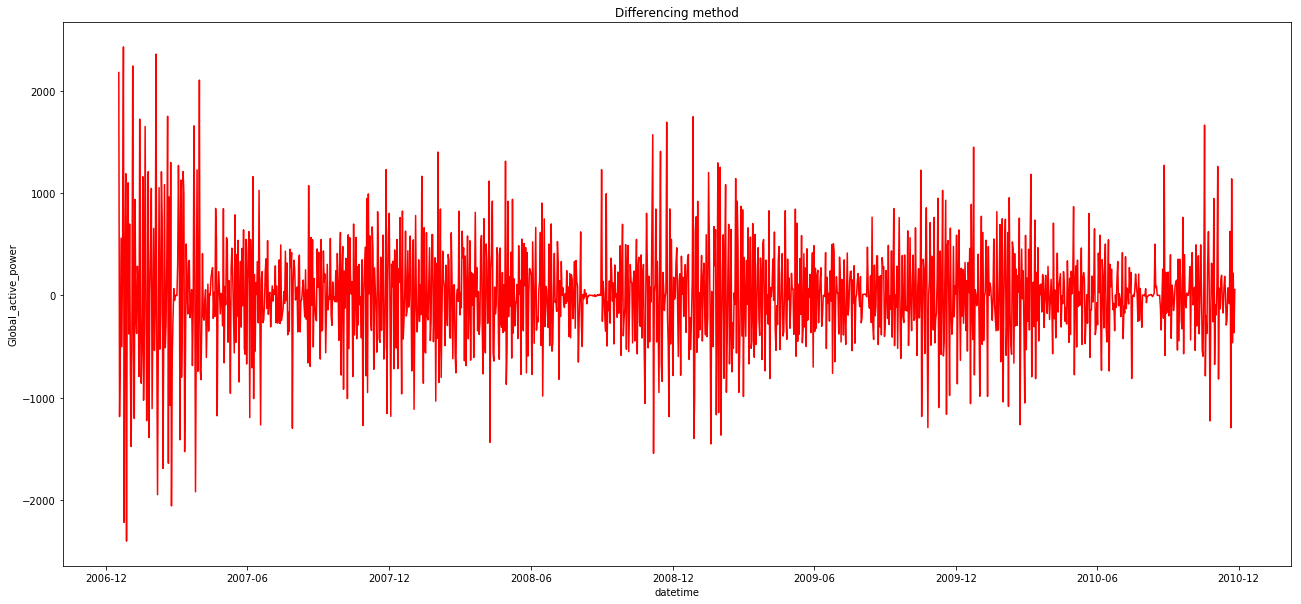

In [42]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff, color='red' )
plt.title("Differencing method") 
plt.xlabel("datetime")
plt.ylabel("Global_active_power")
plt.show()

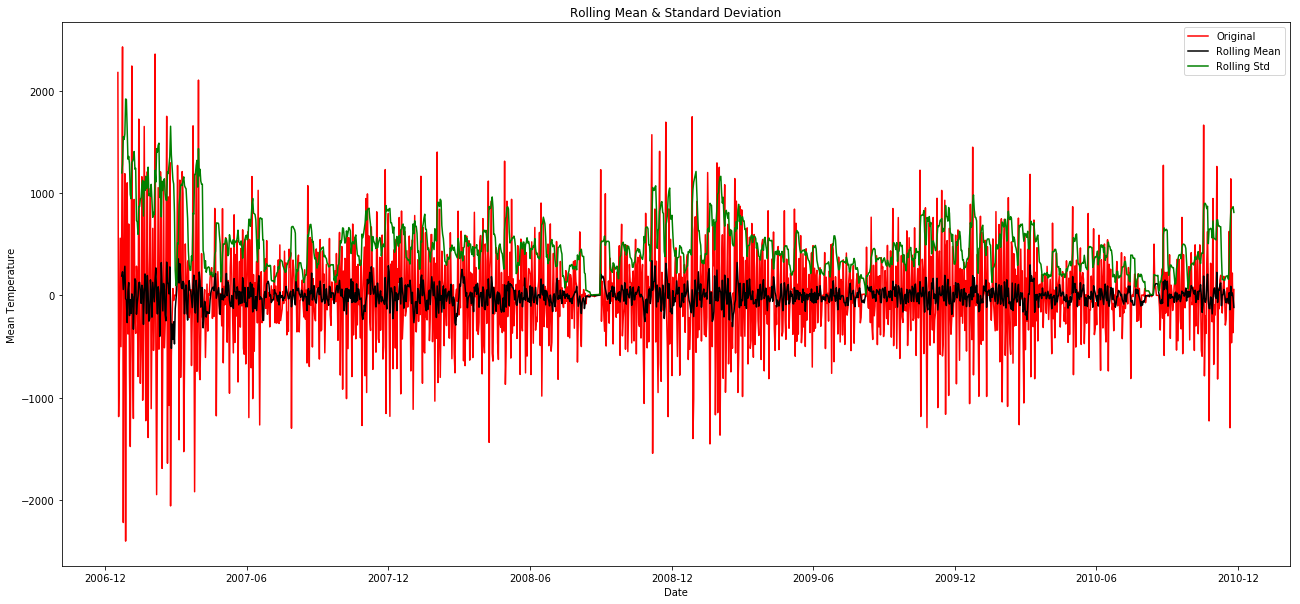

('Test statistic: ', -11.054245341865645)
('p-value: ', 4.9909703669613586e-20)
('Critical Values:', {'5%': -2.8635789736973725, '1%': -3.4349667504625652, '10%': -2.5678555388041384})


In [43]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.Global_active_power)

1. Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
2. Constant variance. It looks like constant. (yes stationary)
3. The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

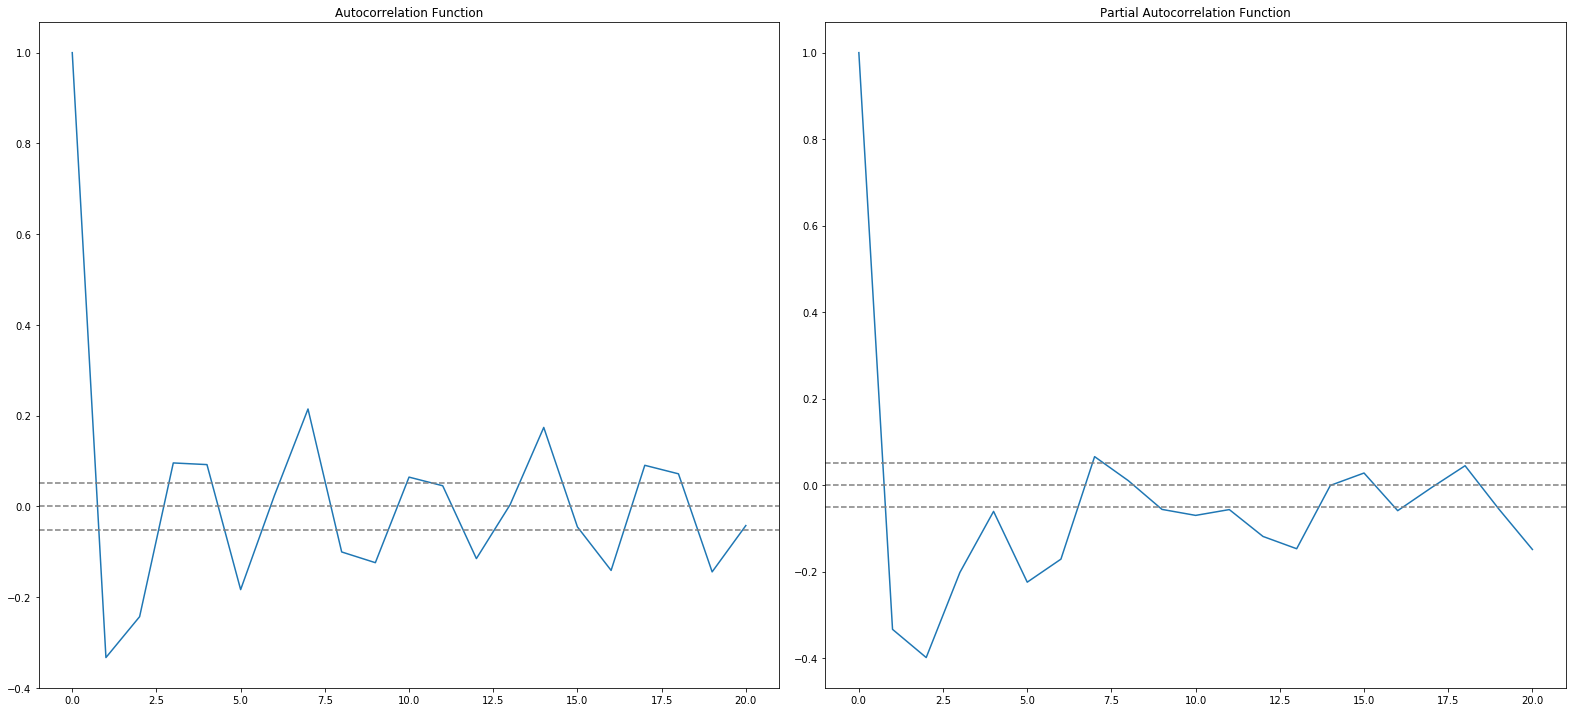

In [44]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

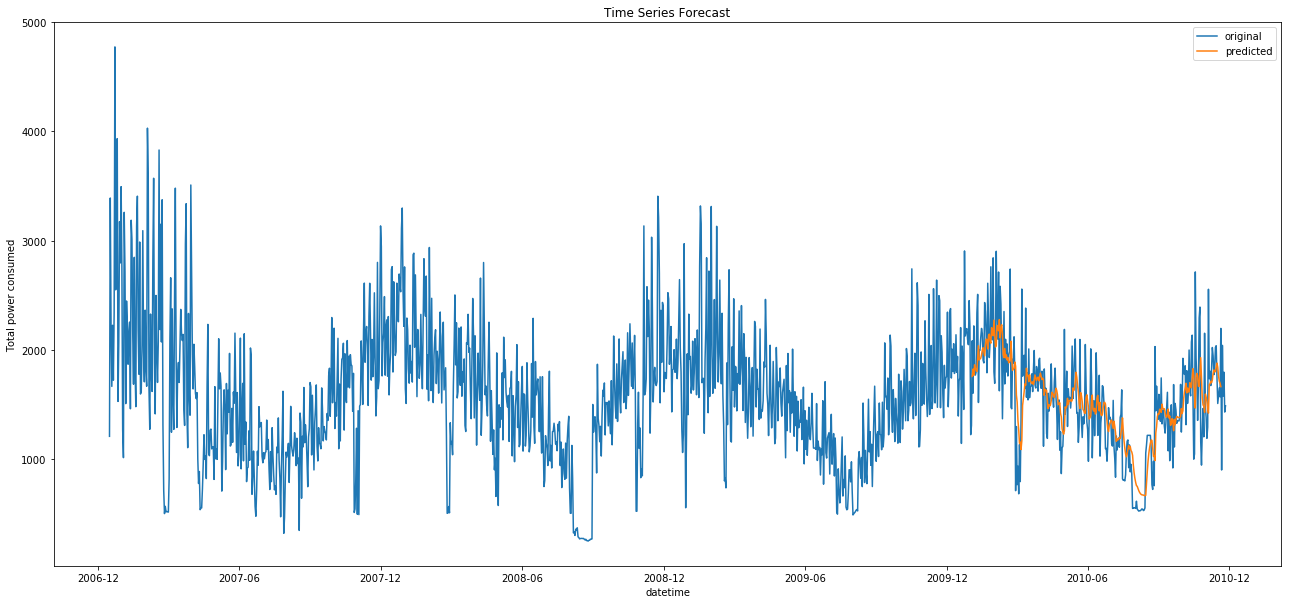

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime

# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)

# predict
start_index = datetime(2010, 1, 3)
end_index = datetime(2010, 11, 20)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(datasett.datetime,datasett.Global_active_power,label = "original")

plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("datetime")
plt.ylabel("Total power consumed")
plt.legend()
plt.show()

('error: ', 195390.354677867)


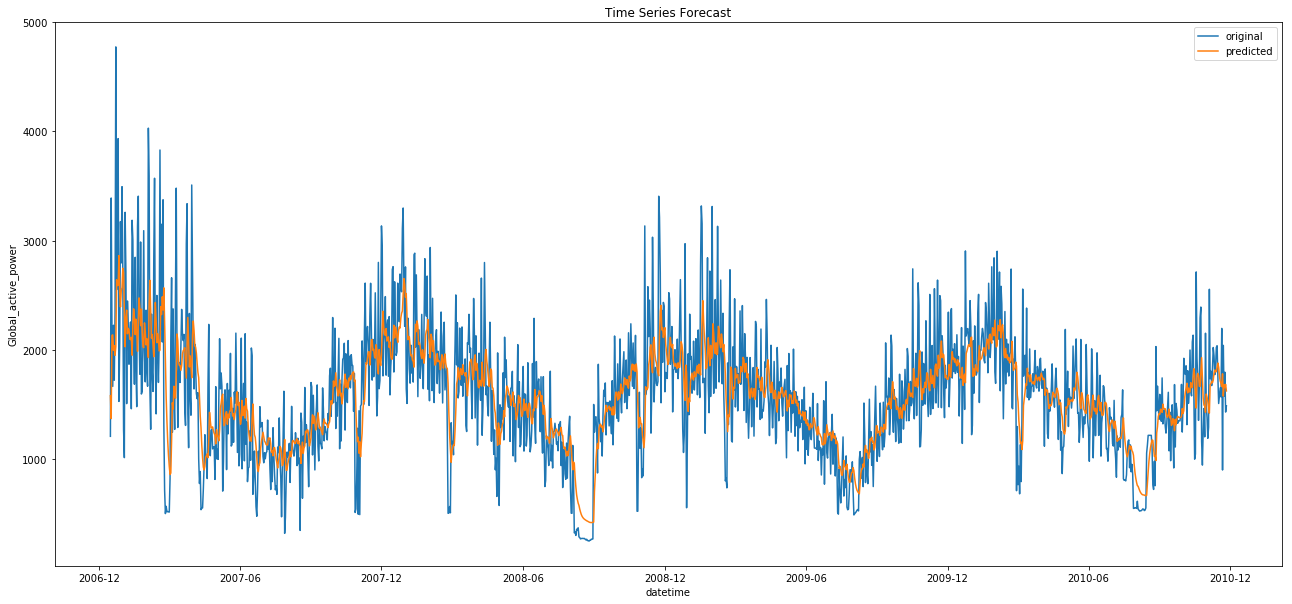

In [46]:
# predict all path
from sklearn.metrics import mean_squared_error
# fit model
model2 = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit2 = model2.fit(disp=0)
forecast2 = model_fit2.predict()
error = mean_squared_error(ts, forecast2)
print("error: " ,error)
# visualization
plt.figure(figsize=(22,10))
plt.plot(datasett.datetime,datasett.Global_active_power,label = "original")
plt.plot(forecast2,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("datetime")
plt.ylabel("Global_active_power")
plt.legend()
plt.savefig('graph.png')

plt.show()

In [64]:
model_fit = model.fit()

In [65]:
hatt = model_fit.predict(start=len(train), end=len(train))

In [66]:
hatt

2007-05-24    1415.755785
Freq: D, dtype: float64